# Group 26 Project Proposal

### Introduction: 

There are a variety of test prep classes that are available to students at varying prices. These courses claim to improve students' performance on exams. 

Predictive Question: Can we use the exam scores of students to predict whether they attended a test preparation course?

The `all_exams.csv` data set is used to determine whether a student took a test prep course. Their exam scores from math, reading, and writing would identify if they attended a test prep course. The data set also contains information about high school students from the US, and includes the students’ gender, race/ethnicity, parental level of education, and lunch access.

The size of the sample was increased to 1200 by combining the downloaded data, since the data is generated spontaneously. By doing this, we expect our model to have a higher accuracy because it will be able to gain familiarity with more data examples.

### Primary Exploratory Data Analysis:

In [22]:
#Run this cell 
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(GGally)

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”
Warning message:
“package ‘tune’ was built under R version 4.0.2”
Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘yardstick’ was built under R version 4.0.2”
── Conflicts ────

In [13]:
options(repr.matrix.max.rows = 10)
all_exams<-read_csv("GP_data/all_exams.csv")
all_exams

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)



X1,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,male,group D,some college,standard,none,69,63,62
2,female,group E,bachelor's degree,free/reduced,completed,65,78,80
3,female,group C,some high school,standard,none,57,56,59
4,female,group D,associate's degree,free/reduced,none,62,73,71
5,male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1196,male,group C,associate's degree,standard,completed,65,63,62
1197,female,group C,some high school,standard,none,69,74,68
1198,female,group D,some college,free/reduced,none,43,48,45


In [16]:
#Tidying the data by changing the column names and the chr data types to fct data types

colnames(all_exams)<-c("X1", "gender", "race_ethnicity", "parental_level_of_education",
"lunch", "test_preparation_course", "math_score", "reading_score", "writing_score")

tidying_data <-select(all_exams, gender:writing_score)%>%
    mutate(across(gender:test_preparation_course, as.factor))
tidying_data

gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
male,group D,some college,standard,none,69,63,62
female,group E,bachelor's degree,free/reduced,completed,65,78,80
female,group C,some high school,standard,none,57,56,59
female,group D,associate's degree,free/reduced,none,62,73,71
male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
male,group C,associate's degree,standard,completed,65,63,62
female,group C,some high school,standard,none,69,74,68
female,group D,some college,free/reduced,none,43,48,45


In [18]:
#Creating the new dataset we will be using

exams_data<-fct_exams%>%
    rowwise(math_score:writing_score)%>%
    mutate(avg_grade=mean(math_score:writing_score))%>%
    select(test_preparation_course, math_score, reading_score, writing_score, avg_grade)
exams_data

test_preparation_course,math_score,reading_score,writing_score,avg_grade
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
none,69,63,62,65.5
completed,65,78,80,72.5
none,57,56,59,58.0
none,62,73,71,66.5
none,46,52,46,46.0
⋮,⋮,⋮,⋮,⋮
completed,65,63,62,63.5
none,69,74,68,68.5
none,43,48,45,44.0


In [25]:
#Splitting the dataset into training and testing data

set.seed(2021)

data_split <- initial_split(exam_data, prop = 0.75, strata = test_preparation_course)
exam_train <- training(data_split)
exam_test <- testing(data_split)

glimpse(exam_train)

Rows: 901
Columns: 5
Rowwise: math_score, reading_score, writing_score
$ test_preparation_course <fct> none, completed, none, none, none, none, none…
$ math_score              <dbl> 69, 65, 57, 62, 46, 39, 78, 57, 80, 85, 79, 5…
$ reading_score           <dbl> 63, 78, 56, 73, 52, 35, 90, 62, 86, 86, 75, 4…
$ writing_score           <dbl> 62, 80, 59, 71, 46, 28, 84, 54, 91, 84, 71, 3…
$ avg_grade               <dbl> 65.5, 72.5, 58.0, 66.5, 46.0, 33.5, 81.0, 55.…


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



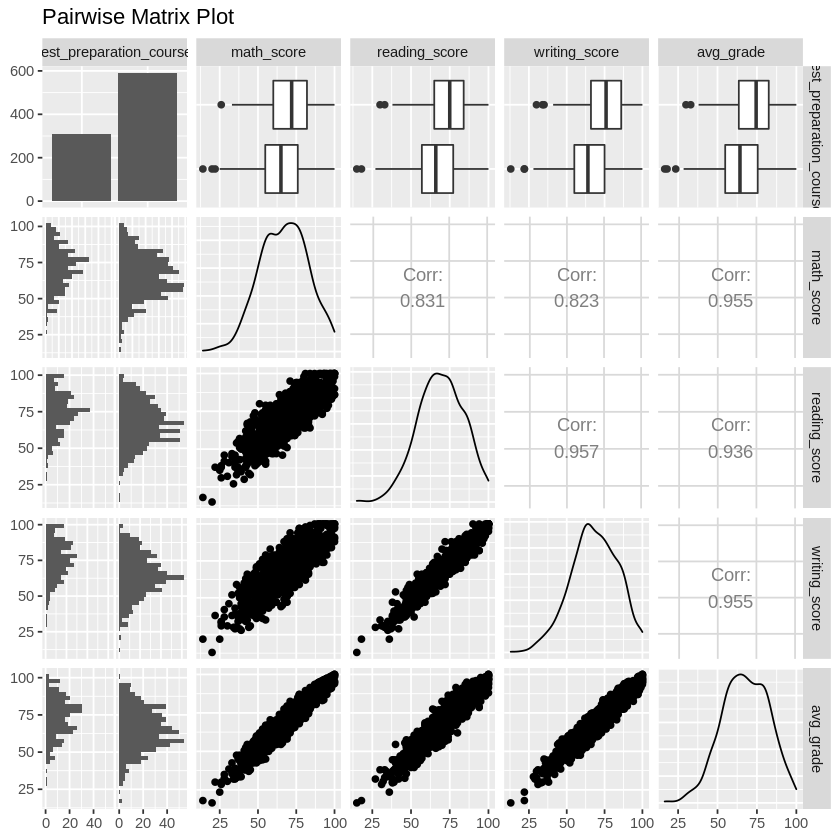

In [27]:
Pairwise_Matrix <- ggpairs(exam_train, title = "Pairwise Matrix Plot")
Pairwise_Matrix

In [29]:
#Determine the average score of all the exams for students who have completed the test prep course and those who haven't

avg_overall<- exam_train%>%
    group_by(test_preparation_course)%>%
    summarize(avg_overall_score=mean(avg_grade))
avg_overall

`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,avg_overall_score
<fct>,<dbl>
completed,73.06958
none,64.82939


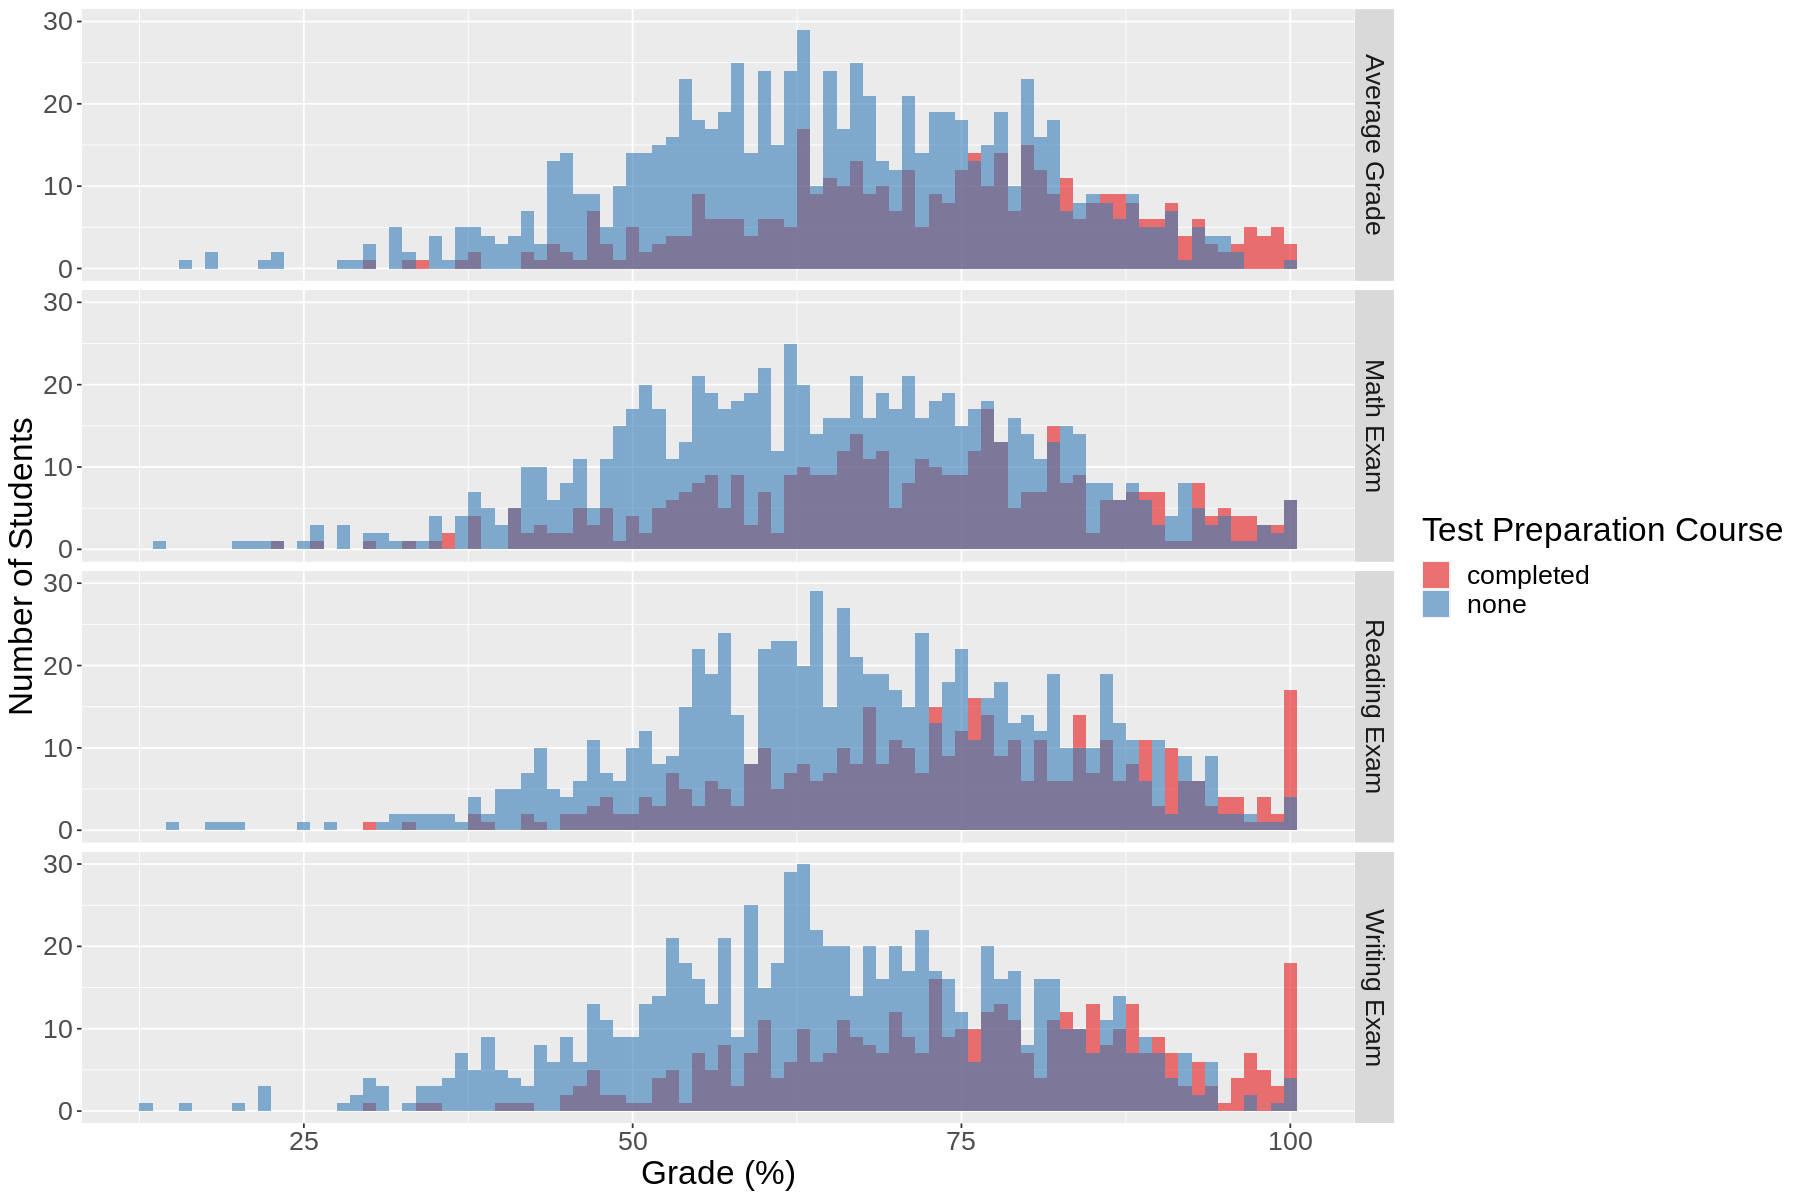

In [7]:
#To compare the graphs easily, we used facet_grid
#Note: when visulize the prediction results we would not use the untidy data shown below because we putting a vertical line in where our new obervation sits would not work. There will be 4 diff lines of code and 4 diff plots and will use `exam_data`
# I DONT KNOW IF WE NEED THIS NOW.
untidy_exams<-exam_data%>%
pivot_longer(cols=(math_score:avg_grade),
            names_to="subject",
            values_to="score")

subject_names<-c(math_score="Math Exam", reading_score="Reading Exam", writing_score="Writing Exam", avg_grade="Average Grade")

options(repr.plot.width = 15, repr.plot.height = 10) 
plot_exam4<-untidy_exams%>%
ggplot(aes(x=score, fill=test_preparation_course))+
geom_histogram(position="identity", alpha=0.6, bins=100, binwidth=1)+
facet_grid(subject ~ ., labeller=as_labeller(sudject_names))+
theme(text = element_text(size = 20))+
labs(x="Grade (%)", y="Number of Students", fill="Test Preparation Course")+
scale_fill_brewer(palette = "Set1")
plot_exam4



### Methods:

Our data analysis will be conducted using the K nearest neighbor classification algorithm using the quantitative variables of the math, writing, and reading exam scores as our predictors. First, a model specification using the K nearest neighbors function would be created. This will be passed through a fit function to ensure our model fits the data set. The data will then be scaled, centered, and balanced to guarantee accuracy. Using this data, we would make a prediction on the new observation.  To build the classifier, we would use the training data, and the testing data would be used to estimate the model’s accuracy. Additionally, we plan to use cross-validation to tune our model to estimate the model’s accuracy. Then, the model would be retrained with the testing data.

Based on the Pairwise Matrix Plot above, we chose the math, writing, and reading exam scores to be our predictors. The second, third, and fourth graphs on the far-left column show that those who completed the test preparation scored higher than those who did not. This is supported by the evidence that the bell curve of the range students who attended the test preparation course was higher than those who did not. This was true for every exam. 

Finally, to visualize our results, we decided to create a decision boundary plot with ??? on the x axis, ??? on the y axis, and ??? as the variable to colour our points.

### Expected outcomes and significance

We expect to find a correlation between high exam scores and attendance to test prep classes. This would determine the effectiveness of the test prep course in the performance of students on different exams. Based on the results of this analysis, future projects might be interested in examining the impact of the test prep courses compared to self-studying methods in students. Other potential areas of exploration could be considering external factors that may affect the students' level of concentration despite attending a test prep course.